In [82]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Hypothesis </h2>
</div>


- Does the risk of survival increase with age? 
- Are women more likely to survive?
- Are single people more likely to survive?
- Is there a correlation with class and survival?
- Can i extract the title of the individuals to deduce class? 
- Is there information encoded in the ticket ?
- What is the importance of the embarcation port?
- How do I handle the incomplete information on the cabin number? Is the information about the cabin even relevant ?
- How do I handle missing data in the age column? 


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Import data </h2>
</div>


In [180]:
path = r'C:\Users\Agnes\OneDrive\Documents\GitHub\Titanic challenge\titanic'
train_path = os.path.join(path,'train.csv')
test_path = os.path.join(path,'test.csv')
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [181]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


survived_df = train_df[['PassengerId','Survived']]
survived_df
cols = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
train_df = train_df[cols]

## Merge the training and the test data frame:
df = pd.concat([train_df,test_df])
df

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. EDA </h2>
</div>


In [183]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Survivors by gender')

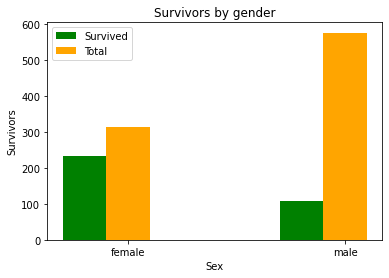

In [184]:
## Does the risk of survival increase with gender?
t = train_df[['Sex','Survived']].groupby(['Sex']).sum()
t['Total'] =  train_df[['Sex','Survived']].groupby(['Sex']).count()
t['Percentage_survived'] = t['Survived']/sum(t['Survived'])
t['Survival_rate_sex'] = t['Survived']/t['Total']

## Create the plot
x = np.arange(2)
y1 = t['Survived']
y2 = t['Total']
width =0.2
plt.bar(x-0.2,y1,width,color ='green')
plt.bar(x,y2,width,color = 'orange')
plt.xticks(x,t.index)
plt.xlabel("Sex")
plt.ylabel('Survivors')
plt.legend(['Survived','Total'])
plt.title('Survivors by gender')

We notice that 74% of women survived while only 18% of men survived. With no surprise out of the survivors, 68% of the survivors are women. It appears that being female increase chance of survival.

In [185]:
## Does the risk of survival increase with age? 
np.sort(train_df['Age'].unique())
# Create buckets by age 
train_df.loc[train_df['Age']<5,'age_bucket'] ='Baby'
train_df.loc[(train_df['Age']>=5) & (train_df['Age']<20),'age_bucket'] ='Child'
train_df.loc[(train_df['Age']>=20) & (train_df['Age']<50),'age_bucket'] ='Adult'
train_df.loc[train_df['Age']>=50,'age_bucket'] ='Elderly'
train_df = train_df.sort_values(['age_bucket'])
#train_df

Text(0.5, 1.0, 'Survivors by age')

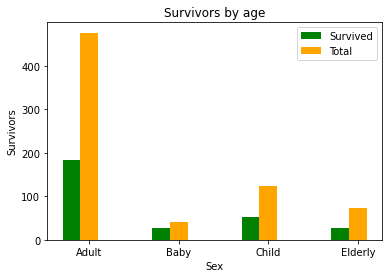

In [186]:
t=train_df[['age_bucket','Survived']].groupby(['age_bucket']).sum()
t['Total']=train_df[['age_bucket','Survived']].groupby(['age_bucket']).count()
t['Percentage_survived'] = t['Survived']/sum(t['Survived'])
t['Survival_rate_age'] = t['Survived']/t['Total']

## Create the plot
x = np.arange(4)
y1 = t['Survived']
y2 = t['Total']
width =0.2
plt.bar(x-0.2,y1,width,color ='green')
plt.bar(x,y2,width,color = 'orange')
plt.xticks(x,t.index)
plt.xlabel("Sex")
plt.ylabel('Survivors')
plt.legend(['Survived','Total'])
plt.title('Survivors by age')

In [187]:
## Number of passengers with not train_df['Age'].isnull().sum()

Text(0.5, 1.0, 'Survivors by embarcation port')

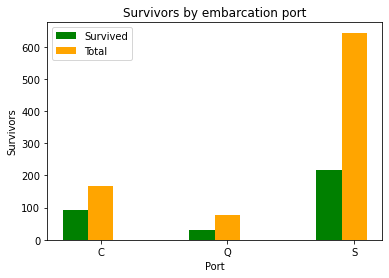

In [188]:
## Correlation between port and survival
t = train_df[['Survived','Embarked']].groupby('Embarked').sum()
t['Total']=train_df[['Survived','Embarked']].groupby(['Embarked']).count()
t['Percentage_survived'] = t['Survived']/sum(t['Survived'])
t['Survival_rate_port'] = t['Survived']/t['Total']

## Create the plot
x = np.arange(3)
y1 = t['Survived']
y2 = t['Total']
width =0.2
plt.bar(x-0.2,y1,width,color ='green')
plt.bar(x,y2,width,color = 'orange')
plt.xticks(x,t.index)
plt.xlabel("Port")
plt.ylabel('Survivors')
plt.legend(['Survived','Total'])
plt.title('Survivors by embarcation port')

In [189]:
t

,Survived,Total,Percentage_survived,Survival_rate_port
Embarked,,,,
C,93,168,0.273529,0.553571
Q,30,77,0.088235,0.389610
S,217,644,0.638235,0.336957


In [190]:
## Find the single people on board 
train_df.loc[(train_df['SibSp'] ==0) &(train_df['Parch']==0),'Status'] = 'Single'
train_df.loc[(train_df['SibSp'] !=0) | (train_df['Parch']!=0),'Status'] = 'With Family'
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,With Family
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S,Adult,With Family
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Adult,Single
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,Adult,Single
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C,Adult,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN,Single
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,With Family
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN,Single
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,NaN,Single


([<matplotlib.patches.Wedge at 0x2af6c589a30>,
 [Text(0.08076356411649081, 1.0970311056260902, 'Single'),
  Text(-0.0807636668279551, -1.0970310980644546, 'With Family')],
 [Text(0.044052853154449526, 0.5983806030687764, '47.7%'),
  Text(-0.0440529091788846, -0.598380598944248, '52.3%')])

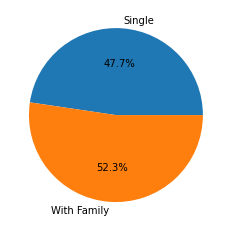

In [191]:
#plt.pie()
labels = 'Single','With Family'
train_df[['Status','Survived']].groupby('Status').sum()['Survived']
plt.pie(train_df[['Status','Survived']].groupby('Status').sum()['Survived'],labels =labels,autopct='%1.1f%%')

There is no strong correlation with boarding the ship as a single person or joining with the family.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Data preparation </h2>
</div>


## Feature engineering

In [192]:
## Can I extract the titles from the names:
train_df['Title']=train_df['Name'].apply(lambda x: x.split()[1])
titles = ['Mr.', 'Miss.', 'Mrs.', 'Mlle.', 'Don.', 'Rev.', 'Dr.',  'Mme.', 'Major.', 'Ms.', 'Jonkheer.', 'Master.','Capt.', 'Col.']
train_df['Title'] = train_df['Title'].apply(lambda x: x if x in titles else '')
train_df['Title'].unique()

array(['Mr.', 'Miss.', 'Major.', '', 'Mrs.', 'Dr.', 'Mme.', 'Jonkheer.',
       'Rev.', 'Mlle.', 'Ms.', 'Don.', 'Master.', 'Col.', 'Capt.'],
      dtype=object)

In [227]:
train_df[ 'Individual fare'] = train_df['Fare']/(train_df['SibSp']+train_df['Parch']+1) 
train_df.sort_values(by =['Individual fare'],ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,Status,Title,Individual fare
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Adult,Single,Mr.,512.3292
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Adult,Single,Miss.,512.3292
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Adult,With Family,Mr.,256.1646
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,NaN,Single,Mr.,227.5250
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,Adult,Single,Miss.,227.5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,Adult,Single,Mr.,0.0000
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,Adult,Single,Mr.,0.0000
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,NaN,Single,Mr.,0.0000
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,NaN,Single,Mr.,0.0000


In [204]:
## How do I handle the missing ages 
'''if person is male:
        if title = master then age is less than 12
    if person is female:
        if title = miss then age is less than 15 '''
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,Status,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,Single,Mr.
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,Single,Mr.
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN,Single,Mrs.
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN,Single,Mr.
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN,Single,Miss.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN,Single,Mr.
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,With Family,Miss.
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN,Single,
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,NaN,Single,Mr.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Modelling </h2>
</div>
